<a href="https://colab.research.google.com/github/taniagoa/Segundo-challenge-CD-Telecom/blob/main/segundo_challenge_Telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import requests
import json
url='https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
datos_json=requests.get(url)
resultado_json=json.loads(datos_json.text)
datos_telecom=pd.DataFrame(resultado_json)

In [56]:
datos_telecom.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#normalizando la tabla datos_telecom

In [57]:
datos_customer=pd.json_normalize(datos_telecom['customer'])
datos_phone=pd.json_normalize(datos_telecom['phone'])
datos_internet=pd.json_normalize(datos_telecom['internet'])
datos_account=pd.json_normalize(datos_telecom['account'])
datos_telecom2=datos_telecom.drop(columns=['customer','phone','internet','account']).join([datos_customer,datos_phone,datos_internet,datos_account])


In [58]:
datos_telecom2.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#Exploramos la nueva tabla datos_telecom2


In [59]:
datos_telecom2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Encontramos que la columna Charges.Total deberia ser Float en lugar de object

#Buscamos valores nulos

In [60]:
datos_telecom2.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


No hay valores nulos

#Buscamos valores duplicados

In [61]:
datos_telecom2.duplicated().sum()

np.int64(0)

No encontramos valores duplicados

#Buscamos celdas vacias

In [62]:
datos_vacios=datos_telecom2.apply(lambda x:x.astype(str).str.strip()=='').sum()
datos_vacios

,0
customerID,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


Encontramos celdas vacias en dos columnas Churn y Charges.Total

#Modificamos el tipo de dato de la columna Charges.Total

In [63]:
import numpy as np

datos_telecom2['Charges.Total']=pd.to_numeric(datos_telecom2['Charges.Total'],errors='coerce')
datos_telecom2['Charges.Total']=datos_telecom2['Charges.Total'].astype(np.float64)
datos_telecom2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#Eliminamos las filas con valores nulos para que no afecten el analisis final

In [64]:
datos_telecom2=datos_telecom2[datos_telecom2['Churn'].str.strip()!='']
datos_telecom2=datos_telecom2.dropna()
datos_telecom2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

#Modificamos los nombres de algunas columnas para mejorar la visualización

In [65]:
datos_telecom2=datos_telecom2.rename(columns={'customerID':'IDcliente','Churn':'evasion','gender':'genero','SeniorCitizen':'adultoMayor','Partner':'pareja','Dependents':'dependientes','tenure':'permanencia','PhoneService':'telefonoFijo','InternetService':'internet','TechSupport':'servicioTecnico','Contract':'contrato','PaperlessBilling':'reciboElectronico','PaymentMethod':'metodoDePago','Charges.Monthly':'cargoMensual','Charges.Total':'cargoTotal'})
datos_telecom2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDcliente          7032 non-null   object 
 1   evasion            7032 non-null   object 
 2   genero             7032 non-null   object 
 3   adultoMayor        7032 non-null   int64  
 4   pareja             7032 non-null   object 
 5   dependientes       7032 non-null   object 
 6   permanencia        7032 non-null   int64  
 7   telefonoFijo       7032 non-null   object 
 8   MultipleLines      7032 non-null   object 
 9   internet           7032 non-null   object 
 10  OnlineSecurity     7032 non-null   object 
 11  OnlineBackup       7032 non-null   object 
 12  DeviceProtection   7032 non-null   object 
 13  servicioTecnico    7032 non-null   object 
 14  StreamingTV        7032 non-null   object 
 15  StreamingMovies    7032 non-null   object 
 16  contrato           7032 non-n

#Convertimos la columna evasion de string a binario para facilitar el analisis

In [66]:
datos_telecom2['evasion']=datos_telecom2['evasion'].map({'Yes':1,'No':0})
datos_telecom2['evasion']=datos_telecom2['evasion'].astype(np.int64)
datos_telecom2['evasion'].head()

,evasion
0,0
1,0
2,1
3,1
4,1


#Creamos la columna Cuentas diarias

In [67]:
datos_telecom2['cuentasDiarias']=datos_telecom2['cargoMensual']/12
datos_telecom2.head()

,IDcliente,evasion,genero,adultoMayor,pareja,dependientes,permanencia,telefonoFijo,MultipleLines,internet,...,DeviceProtection,servicioTecnico,StreamingTV,StreamingMovies,contrato,reciboElectronico,metodoDePago,cargoMensual,cargoTotal,cuentasDiarias
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,5.466667
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,4.991667
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,6.158333
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,8.166667
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,6.991667


##Carga y analisis

In [68]:
datos_telecom2.describe()

,evasion,adultoMayor,permanencia,cargoMensual,cargoTotal,cuentasDiarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,32.421786,64.798208,2283.300441,5.399851
std,0.441782,0.368844,24.545260,30.085974,2266.771362,2.507164
min,0.000000,0.000000,1.000000,18.250000,18.800000,1.520833
25%,0.000000,0.000000,9.000000,35.587500,401.450000,2.965625
50%,0.000000,0.000000,29.000000,70.350000,1397.475000,5.862500
75%,1.000000,0.000000,55.000000,89.862500,3794.737500,7.488542
max,1.000000,1.000000,72.000000,118.750000,8684.800000,9.895833


# Crear gráfico circular de la evasion

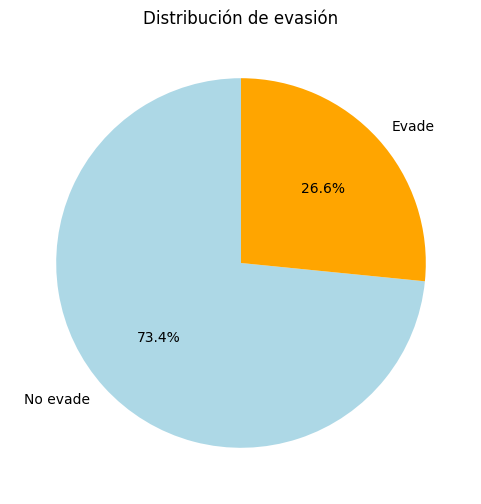

In [101]:

counts = datos_telecom2['evasion'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts, labels=['No evade','Evade'], autopct='%1.1f%%',startangle=90,colors=['lightblue','orange'])
plt.title("Distribución de evasión")
plt.show()


tenmos un 26.6% de evasión

In [69]:
datos_telecom2.groupby('evasion')['permanencia'].describe()

,count,mean,std,min,25%,50%,75%,max
evasion,,,,,,,,
0,5163.0,37.650010,24.076940,1.0,15.0,38.0,61.0,72.0
1,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


Relacionando evasion con permanencia, podemos encontrar que los clientes que evaden se van en promedio en los 10 primeros meses, hay una desviacion estandar alta lo que indica que los datos estan muy dispersos


# Histograma de permanencia por evasión

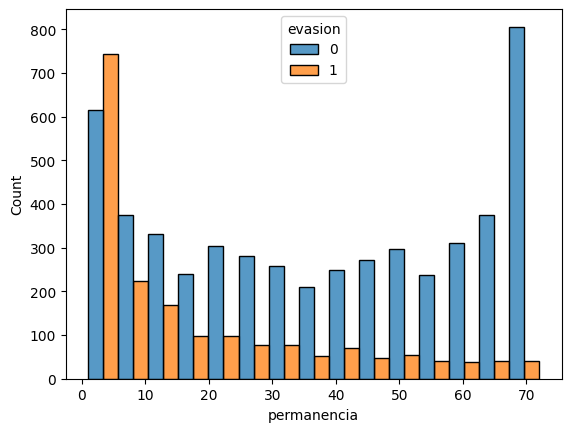

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=datos_telecom2, x='permanencia', hue='evasion', multiple='dodge')
plt.show()



#Histograma de metodo de pago por evasion

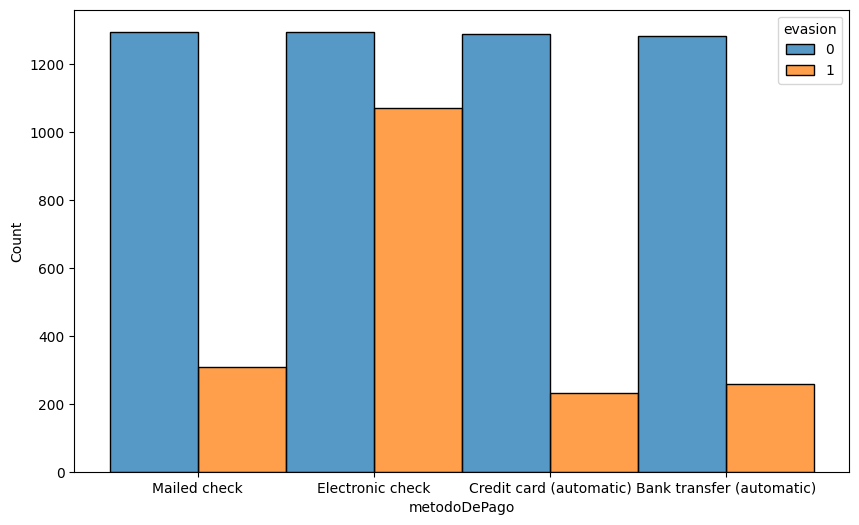

In [95]:
plt.figure(figsize=(10, 6))
sns.histplot(data=datos_telecom2, x='metodoDePago', hue='evasion', multiple='dodge',)
plt.show()

#Histograma duración de contrato por evasion

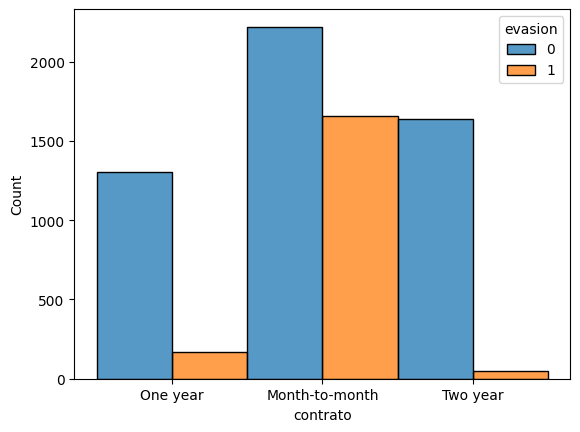

In [72]:
sns.histplot(data=datos_telecom2, x='contrato', hue='evasion', multiple='dodge')
plt.show()

se observa que la mayor parte de evasores adquieren un contrato de tipo mensual, lo cual indicaria que no tienen intencion de permanecer con el servicio un año o mas

#Histograma de recibo electronico por evasion

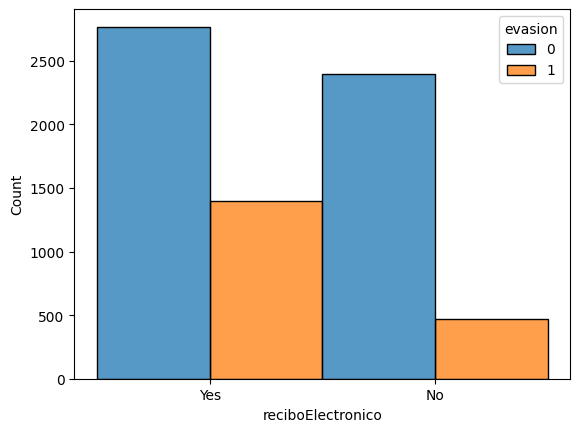

In [73]:
sns.histplot(data=datos_telecom2, x='reciboElectronico', hue='evasion', multiple='dodge')
plt.show()

#Histograma de servicio de internet por evasion

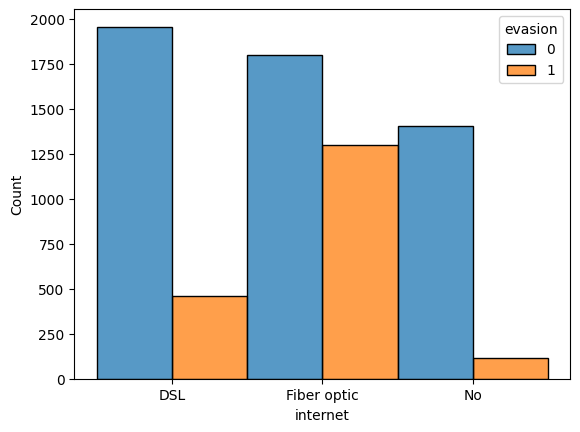

In [74]:
sns.histplot(data=datos_telecom2, x='internet', hue='evasion', multiple='dodge')
plt.show()

#Histogramas de servicios adicionales por evasion

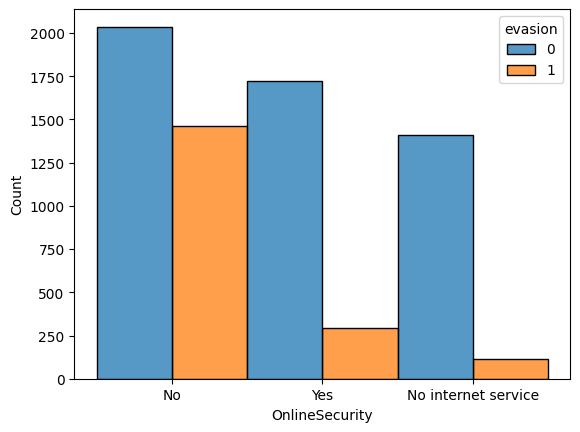

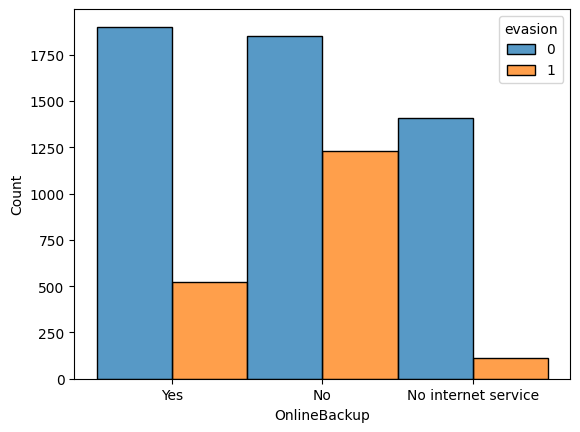

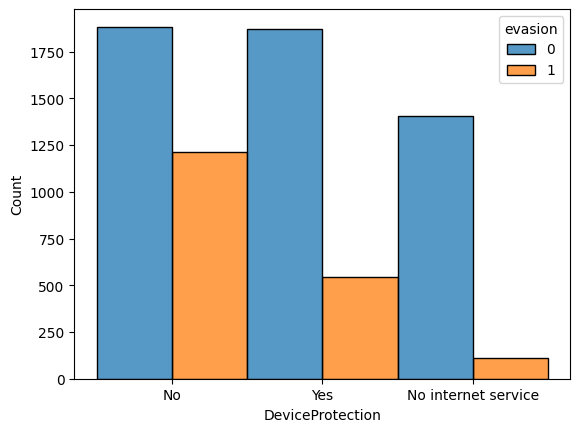

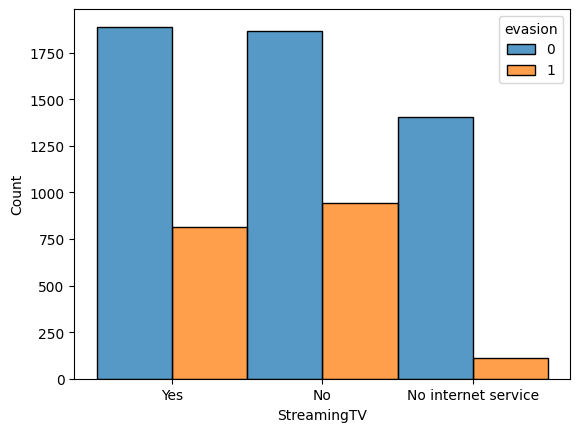

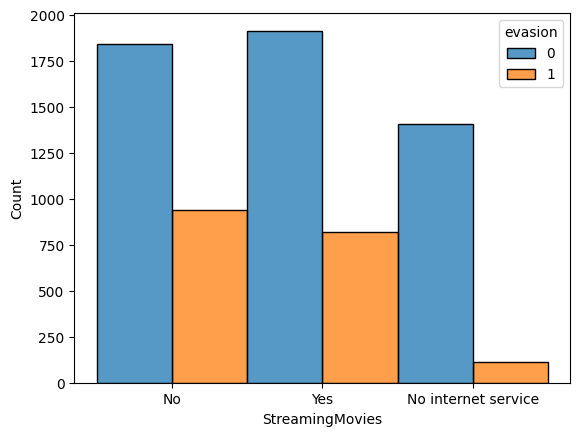

In [75]:
servicios = ['OnlineSecurity','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies']
for s in servicios:
  sns.histplot(data=datos_telecom2, x=s, hue='evasion', multiple='dodge')
  plt.show()


observamos que los servicios adicionales como online security, online backup y device protection no son populares entre los usuarios evasores, los servicios de streaming son un poco mas populares entre los evasores, sin embargo podemos decir que en general los usuarios que permanecen en el servicio son quienes acceden mas a los servicios adicionales

# Boxplot de cargo total por evasión

In [76]:
datos_telecom2.groupby('evasion')['cargoTotal'].describe()

,count,mean,std,min,25%,50%,75%,max
evasion,,,,,,,,
0,5163.0,2555.344141,2329.456984,18.80,577.825,1683.60,4264.125,8672.45
1,1869.0,1531.796094,1890.822994,18.85,134.500,703.55,2331.300,8684.80


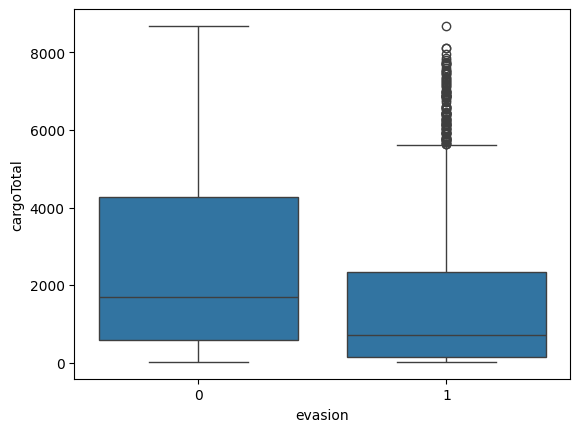

In [77]:

sns.boxplot(data=datos_telecom2, x='evasion', y='cargoTotal')
plt.show()


Podemos ver que los cliente que no evaden representan una mayor recaudacion, los clientes que evaden presentan una recaudacion baja lo cual indicaria que se retiran del servicio en muy poco tiempo, resaltando algunas excepciones con recaudaciones mas altas

# Boxplot de cargoMensual por evasión

In [78]:
datos_telecom2.groupby('evasion')['cuentasDiarias'].describe()

,count,mean,std,min,25%,50%,75%,max
evasion,,,,,,,,
0,5163.0,5.108951,2.591213,1.520833,2.091667,5.370833,7.372917,9.895833
1,1869.0,6.203444,2.055504,1.570833,4.679167,6.637500,7.850000,9.862500


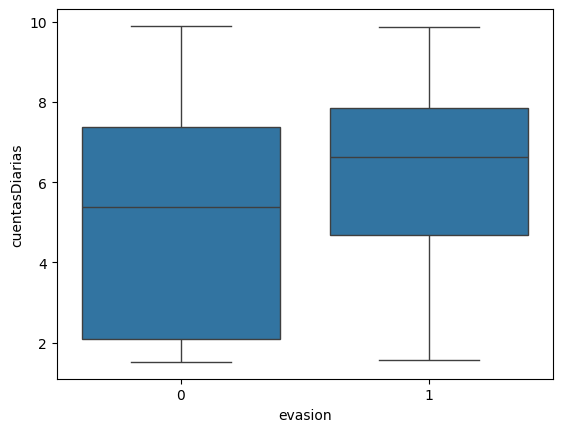

In [79]:
sns.boxplot(data=datos_telecom2, x='evasion', y='cuentasDiarias')
plt.show()

Observamos que los clientes que no evaden presentan un cargo menor por mes, promedio 5.37,los clientes evasores presentan un cargo diario mayor, en promedio 6.63

###Informe Final



#Introduccion
El objetivo de este analisis es determinar las causas de la evasión de servicio en los clientes, con la finalidad de identificar las causas y sugerir una accion que evite la evasión
#Limpieza y Tratamiento de datos
Los datos fueron obtenidos de la API Telecon en formato json, se realizó una normalización de la tabla,una exploración para buscar datos duplicados y nulos,se realizó una corrección de tipo de dato de string a numerico.
Al tener una gran cantidad de datos se opta por eliminar las filas que contienen datos vacios o nulos para evitar una alteración en la estadistica general.
#Analisis Exploratorio
Realizamos un grafico pie chart, para visualizar el porcentaje de clientes evasores encontrando un 26.6% de evasión que resulta significativo.
Realizamos relaciones entre la evasion y permanencia en el servicio, para comparar usamos un histograma, encontrando que en promedio los evasores permanecen en promedio 10 meses.
Aplicamos el histograma para visualizar la relacion entre la evasion y otros parametros categóricos como metodo de pago, duración de contrato, recibo electronico, servicio de internet y servicios añadidos, encontramos algunas relaciones resaltantes como que los evasores tienden a contratar el servicio por mes,contrataron en su mayoria el servicio de internet por fibra optica,no contratan muchos servicios añadidos, cuando lo hacen prefieren servicios de streaming.
Realizamos graficas tipo boxplot para visualizar la relacion entre la evasion y los cargos totales y costo diario, encontramos que los evasores presentan una  recaudacion total notablemente menor que los clientes que permanecen en el servicio, lo cual apunta a que permanecen poco tiempo en el servicio,tambien encontramos que los evasores tienen un mayor gasto diario en promedio que los clientes permanentes
#Conclusiones e Insights
Podemos concluir que los primeros meses son los mas criticos para fidelizar al cliente,los clientes que contratan el servicio por mes estan en un "periodo de prueba" si no logramos fidelizarlos tienen probabilidad alta de evasion, los servicios adicionales de streaming pueden usarse como un medio de fidelización
#Recomendaciones
Recomendamos estrategias de fidelización enfocadas en el primer año de contrato,actualmente el cargo diario es elevado en el grupo evasores asi que se podria dar tarifas promocionales y hacer mas atractivos los servicios de streaming
